In [1]:
%matplotlib inline

This example adapted from the one located at https://github.com/yeatmanlab/pyAFQ/blob/master/examples/plot_tract_profile.py

# Import all necessary packages

In [3]:
import os.path as op
import os
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nib
import dipy.data as dpd
from dipy.data import fetcher
from dipy.viz import window, actor, ui
from IPython.display import Image
import importlib as imp
from dipy.tracking.utils import flexi_tvis_affine, move_streamlines
from glob import glob

import importlib as imp

import AFQ.utils.streamlines as aus
import AFQ.data as afd
import AFQ.tractography as aft
import AFQ.registration as reg
import AFQ.dti as dti
import AFQ.csd as csd
import AFQ.segmentation as seg

import AFQ as afq

#Displaying results as HTML
from glob import glob
from IPython.display import display, HTML

/Users/kesshijordan/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
def savenii(data, aff, path):
    img = nib.Nifti1Image(data, aff)
    img.get_data_dtype() == np.dtype(np.int16)
    img.set_qform(aff, 1)
    img.set_sform(aff, 1)
    img.to_filename(path)

In [4]:
imp.reload(afq)

<module 'AFQ' from '/Users/kesshijordan/anaconda/lib/python3.6/site-packages/pyAFQ-0.1.dev0-py3.6.egg/AFQ/__init__.py'>

In [5]:
putdir = './pyAFQ_scan_rescan_outputs'
if not os.path.exists(putdir):
    os.mkdir(putdir)

# Load a whole-brain streamline dataset

In [5]:
pathpath = '/Users/kesshijordan/paths/pyafq_test_basepath.txt'

with open(pathpath, 'r') as myfile:
    template_basepath = myfile.read().replace('\n', '').replace('\'','')

In [6]:
hardi_fdata = glob(os.path.join(template_basepath, '*dti_b2500_SC_EC.nii.gz'))[0]
hardi_fbval = glob(os.path.join(template_basepath, '*dti_b2500_SC_EC.bval'))[0]
hardi_fbvec = glob(os.path.join(template_basepath, '*dti_b2500_SC_EC.bvec'))[0]

FA_path = glob(os.path.join(template_basepath, '*dti_b2500_SC_EC_fa.nii.gz'))[0]

img = nib.load(hardi_fdata)

maskpath_wm = os.path.join(template_basepath,'parcellation/WM_hemispheres_diffsp.nii.gz')

wb_trkpath = os.path.join(template_basepath,'TRACKs/kmj_ILF_prob.trk')
#wb_trkpath = os.path.join(template_basepath,'TRACKs/Whole_Brain_bs_prob.trk')
#wb_trkpath = os.path.join(template_basepath,'TRACKs/Whole_Brain_bs_prob_gt40mm_good.trk)'

In [45]:
trk,hdr = nib.trackvis.read(wb_trkpath)
sls=[item[0] for item in trk]

In [8]:
FA_img = nib.load(FA_path)
FA_data = FA_img.get_data()
FA_aff = FA_img.affine

In [9]:
hdr['voxel_order']

array(b'las', dtype='|S4')

In [10]:
flexi_aff = flexi_tvis_affine('las', FA_aff, hdr['dim'], hdr['voxel_size'])
flexi_aff

array([[2., 0., 0., 1.],
       [0., 2., 0., 1.],
       [0., 0., 2., 1.],
       [0., 0., 0., 1.]])

In [67]:
nib.streamlines.detect_format(wb_trkpath)

nibabel.streamlines.trk.TrkFile

In [120]:
#tg = nib.streamlines.trk.TrkFile.load(wb_trkpath).tractogram
#tg = nib.streamlines.load(wb_trkpath).tractogram
#streamlines=tg.streamlines.apply_affine(flexi_aff)
#streamlines = tg.apply_affine(np.linalg.inv(img.affine)).streamlines
#streamlines = tg.apply_affine(img.affine).streamlines
#streamlines = tg.apply_affine(flexi_aff).streamlines
print('loaded %i streamlines' %(len(streamlines)))

loaded 2242 streamlines


In [175]:
trkloaded = nib.streamlines.trk.TrkFile.load(wb_trkpath)
hdrloaded = trkloaded.header
tg=trkloaded.tractogram

tvis2rasmm = nib.streamlines.trk.get_affine_trackvis_to_rasmm(hdrloaded)

#streamlines = tg.apply_affine(tvis2rasmm).streamlines
streamlines=tg.streamlines
#streamlines=tg.apply_affine(np.linalg.inv(aff4tvis)).streamlines

#im2rasmm = nib.streamlines.t

In [176]:
from dipy.io.bvectxt import orientation_from_string
from dipy.tracking.utils import affine_for_trackvis

In [177]:
#Mapping from the voxel indices of the reference image to trackvis space.
aff4tvis = affine_for_trackvis(hdr['voxel_size'])

In [178]:
print(str(hdr['voxel_order'])[2:-1])
orientation_from_string(str(hdr['voxel_order'])[2:-1])



las


array([[ 0, -1],
       [ 1,  1],
       [ 2,  1]])

In [179]:
tvis2rasmm

array([[-9.9968278e-01,  0.0000000e+00, -2.5185211e-02,  1.1259161e+02],
       [-1.0972291e-03,  9.9905038e-01,  4.3555461e-02, -1.0054063e+02],
       [-2.5161300e-02, -4.3569282e-02,  9.9873346e-01, -6.5227699e+01],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  1.0000000e+00]],
      dtype=float32)

In [180]:
#load raw
streamlines[0][0,:]

array([ 55.797924,  38.733208, -37.082756], dtype=float32)

/Users/kesshijordan/anaconda/lib/python3.6/site-packages/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \


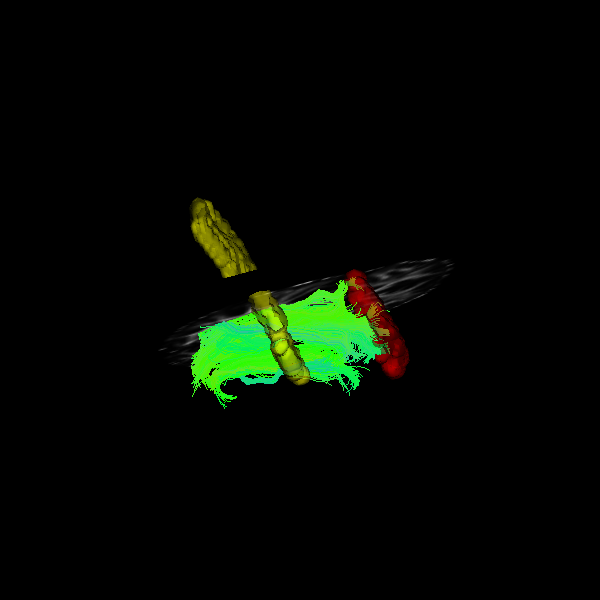

In [193]:
genren_AGG(streamlines,FA_data,roi1,roi2,FA_aff,'TEST2.png')
Image('TEST2.png')#trk=nib.streamlines.trk.TrkFile(tg)

/Users/kesshijordan/anaconda/lib/python3.6/site-packages/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \


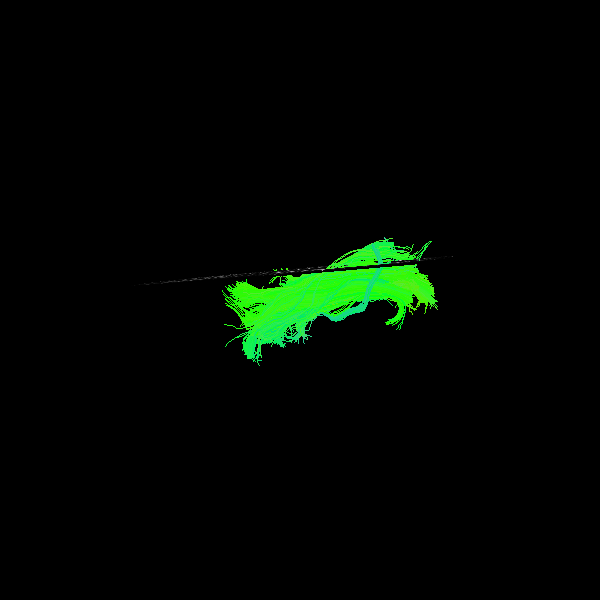

In [183]:
genren_slices_NEW(streamlines,FA_data,FA_aff,'TEST2.png')
Image('TEST2.png')#trk=nib.streamlines.trk.TrkFile(tg)

/Users/kesshijordan/anaconda/lib/python3.6/site-packages/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \


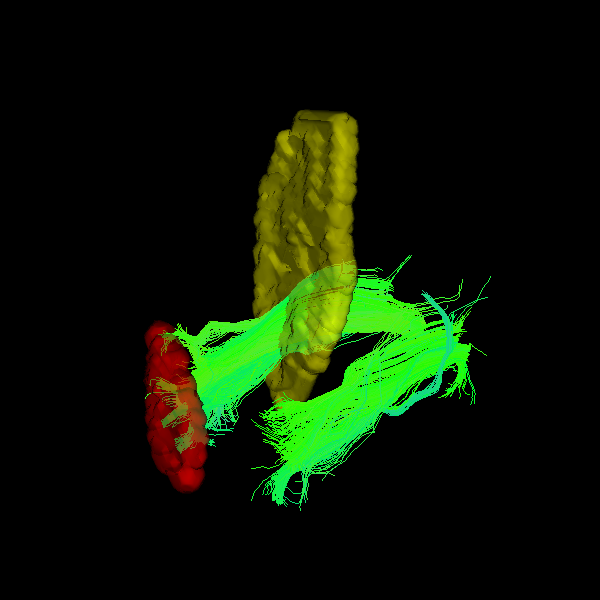

In [184]:
genren_rois_NEW(streamlines,roi1,roi2,FA_aff,'TEST.png')
Image('TEST.png')#trk=nib.streamlines.trk.TrkFile(tg)

# Segment Bundles

## Pick which tracks you want

In [13]:
# Use only a small portion of the streamlines, for expedience:
#streamlines = csd_streamlines[::100]

templates = afd.read_templates()
bundle_names = ["ILF"]

bundles = {}
for name in bundle_names:
    for hemi in ['_R', '_L']:
        bundles[name + hemi] = {'ROIs': [templates[name + '_roi1' + hemi],
                                         templates[name + '_roi2' + hemi]],
                                'rules': [True, True]}


Dataset is already in place. If you want to fetch it again please first remove the folder /Users/kesshijordan/AFQ_data/templates 


In [14]:
#kesh_bundles = {'ROIs':templates[]}

In [15]:
bundles

{'ILF_L': {'ROIs': [<nibabel.nifti1.Nifti1Image at 0x11d776940>,
  'rules': [True, True]},
 'ILF_R': {'ROIs': [<nibabel.nifti1.Nifti1Image at 0x11d776ac8>,
  'rules': [True, True]}}

## Register your data to MNI space

Note: Don't forget to check the registration!

In [16]:
import dipy.align.imwarp as imwarp
from dipy.viz import regtools
from dipy.align.imaffine import (transform_centers_of_mass, AffineMap, MutualInformationMetric, AffineRegistration)
from dipy.align.transforms import (TranslationTransform3D, RigidTransform3D, AffineTransform3D)

from dipy.align.imwarp import SymmetricDiffeomorphicRegistration
from dipy.align.imwarp import DiffeomorphicMap
from dipy.align.metrics import CCMetric

from dipy.io.pickles import save_pickle, load_pickle

In [17]:
def showme(static_im, moving_resampled_im, savebasename=None):
    regtools.overlay_slices(static_im, moving_resampled_im, None, 0, "Static", "Moving")
    regtools.overlay_slices(static_im, moving_resampled_im, None, 1, "Static", "Moving")
    regtools.overlay_slices(static_im, moving_resampled_im, None, 2, "Static", "Moving")

In [18]:
MNI_FA_img = nib.load('/usr/local/fsl/data/standard/FMRIB58_FA_1mm.nii.gz')

# template
static = MNI_FA_img.get_data()
# pt data
moving = FA_img.get_data()

static_grid2world = MNI_FA_img.affine
moving_grid2world = FA_img.affine

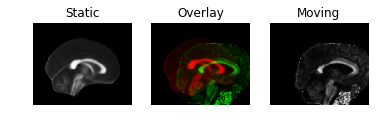

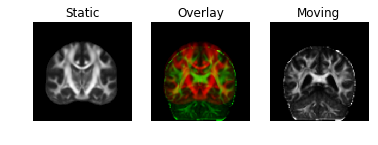

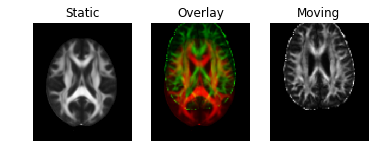

In [19]:
identity = np.eye(4)
affine_map = AffineMap(identity, static.shape, static_grid2world, moving.shape, moving_grid2world)
resampled = affine_map.transform(moving)
showme(static, resampled)

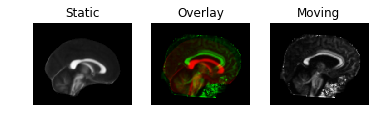

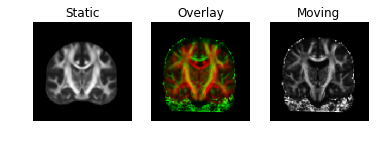

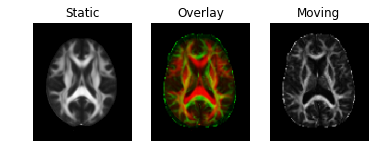

In [20]:
c_of_mass = transform_centers_of_mass(static, static_grid2world, moving, moving_grid2world)
transformed_com = c_of_mass.transform(moving)
showme(static, transformed_com, 'prisma_hc_step1_com')

nbins=32
sampling_prop=None
metric=MutualInformationMetric(nbins, sampling_prop)
level_iters = [100000, 1000, 100]
sigmas = [3.0, 1.0, 0.0]
factors = [4,2,1]
affreg = AffineRegistration(metric=metric, level_iters=level_iters, sigmas=sigmas, factors=factors)

transform=TranslationTransform3D()
params0=None
starting_affine = c_of_mass.affine
translation = affreg.optimize(static, moving, transform, params0, static_grid2world, moving_grid2world, starting_affine=starting_affine)
transformed_trans = translation.transform(moving)
showme(static, transformed_trans)

loading from pkl


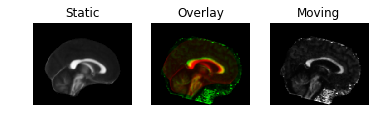

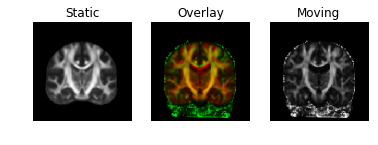

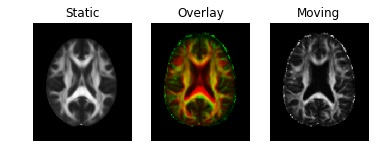

In [21]:
mypklrigid = 'prisma_hc_rigid.pkl'
if not os.path.exists(mypklrigid):
    transform = RigidTransform3D()
    params0 = None
    starting_affine = translation.affine
    rigid = affreg.optimize(static, moving, transform, params0,
                        static_grid2world, moving_grid2world,
                        starting_affine=starting_affine)
    save_pickle(mypklrigid, rigid)
else:
    print("loading from pkl")
    rigid = load_pickle(mypklrigid)
    
transformed_rigid = rigid.transform(moving)
showme(static, transformed_rigid)

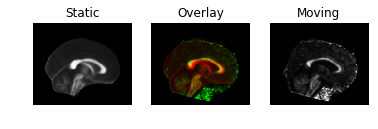

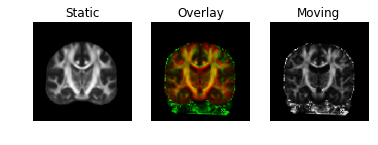

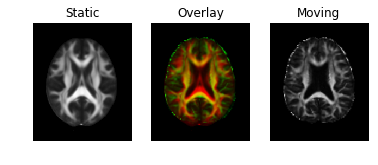

In [22]:
mypklaff = 'prisma_hc_affine.pkl'
if not os.path.exists(mypklaff):
    transform = AffineTransform3D()
    params0 = None
    starting_affine = rigid.affine
    affine = affreg.optimize(static, moving, transform, params0,
                             static_grid2world, moving_grid2world,
                             starting_affine=starting_affine)
    save_pickle('prisma_hc_affine.pkl', affine)
else:
    affine = load_pickle(mypklaff)
transformed_affine = affine.transform(moving)
showme(static, transformed_affine)

Loading pickle


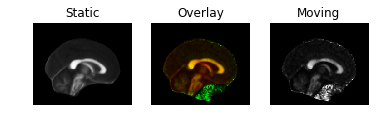

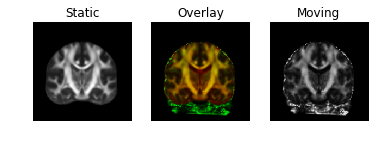

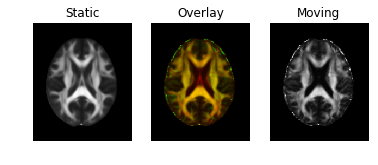

In [23]:
mypklwarp = 'prisma_hc_warp.pkl'
if not os.path.exists(mypklwarp):
    metric=CCMetric(3)
    pre_align = affine.affine
    level_iters = [10, 10, 5]
    sdr = SymmetricDiffeomorphicRegistration(metric, level_iters)
    mapping_fa = sdr.optimize(static, moving, static_grid2world, moving_grid2world, pre_align)
    save_pickle(mypklwarp, mapping_fa)
else:
    print("Loading pickle")
    mapping_fa = load_pickle(mypklwarp)

warped_moving_fa = mapping_fa.transform(moving)

reg.write_mapping(mapping_fa, 'careful_reg_mapping.nii.gz')

showme(static, warped_moving_fa)
#warp_save_path = os.path.join(putpath, 'MNI_in_pt_diffsp_diffeo.nii.gz')
#savenii(warped_moving_fa, static_grid2world, warp_save_path)

FORCE_RERUN=False

#MNI_T2_img = dpd.read_mni_template()
MNI_FA_img = '/usr/local/fsl/data/standard/FMRIB58_FA_1mm.nii.gz'
if not op.exists(os.path.join(putdir,'mapping.nii.gz')) or FORCE_RERUN:
    print("Registering to template...")
    import dipy.core.gradients as dpg
    gtab = dpg.gradient_table(hardi_fbval, hardi_fbvec)
    mapping = reg.syn_register_dwi(hardi_fdata, gtab, template=MNI_FA_img)
    reg.write_mapping(mapping, os.path.join(putdir,'mapping.nii.gz'))
else:
    print("loading mapping")
    mapping = reg.read_mapping(os.path.join(putdir,'mapping.nii.gz'), img, MNI_T2_img)

In [24]:
#mapping_read =reg.read_mapping('careful_reg_mapping.nii.gz', FA_img, MNI_FA_img)
#mapping = mapping_fa
mapping=load_pickle('prisma_hc_warp.pkl')

In [25]:
short_streamlines = streamlines[::100]

## Segment Fascicles

In [185]:
print("Segmenting fiber groups...")
fiber_groups = seg.segment(hardi_fdata,
                           hardi_fbval,
                           hardi_fbvec,
                           streamlines,
                           bundles,
                           reg_template=MNI_FA_img,
                           mapping=mapping,
                           as_generator=False, affine=flexi_aff)

Segmenting fiber groups...
ILF_R
hole_filling!!!!
hole_filling!!!!
ILF_L
hole_filling!!!!
hole_filling!!!!


In [186]:
for i in fiber_groups:
    print(i)
    print(len(fiber_groups[i]))

ILF_R
32
ILF_L
163


In [187]:
bundles

{'ILF_L': {'ROIs': [<nibabel.nifti1.Nifti1Image at 0x11d776940>,
  'rules': [True, True]},
 'ILF_R': {'ROIs': [<nibabel.nifti1.Nifti1Image at 0x11d776ac8>,
  'rules': [True, True]}}

Extracting tract profiles...


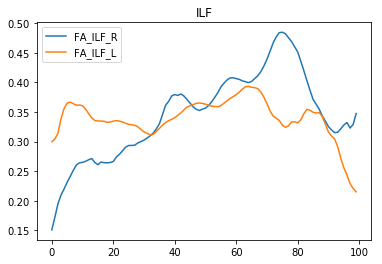

In [188]:
print("Extracting tract profiles...")

for bundle in bundles:
    if bundle[-1] == 'R':
        fig, ax = plt.subplots(1)
        ax.set_title(bundle[:-2])
    profile = seg.calculate_tract_profile(FA_data, fiber_groups[bundle])
    ax.plot(profile, label='FA_'+bundle)
    ax.legend()


# Let's look at how similar these tracks are

In [189]:
def genren(sls, putpath):
    
    renderer = window.Renderer()
    
    stream_actor = actor.line(sls)

    renderer.set_camera(position=(-176.42, 118.52, 128.20),
                        focal_point=(113.30, 128.31, 76.56),
                        view_up=(0.18, 0.00, 0.98))

    renderer.add(stream_actor)

    # Uncomment the line below to show to display the window
    #window.show(renderer, size=(600, 600), reset_camera=False)
    window.record(renderer, out_path=putpath, size=(600, 600))
    return putpath

In [190]:
def genren_rois_NEW(sls, roi1, roi2, aff, putpath):
    
    renderer = window.Renderer()
    
    stream_actor = actor.line(sls)
    
    contour_actor1 = actor.contour_from_roi(roi1, affine=aff, color=(1., 1., 0.),
                                      opacity=0.5)
    contour_actor2 = actor.contour_from_roi(roi2, affine=aff, color=(1., 0., 0.),
                                      opacity=0.5)

    renderer.set_camera(position=(-176.42, 118.52, 128.20),
                        focal_point=(113.30, 128.31, 76.56),
                        view_up=(0.18, 0.00, 0.98))

    renderer.add(stream_actor)
    renderer.add(contour_actor1)
    renderer.add(contour_actor2)

    # Uncomment the line below to show to display the window
    window.show(renderer, size=(600, 600), reset_camera=False)
    window.record(renderer, out_path=putpath, size=(600, 600))
    del renderer
    return putpath

In [191]:
def genren_slices_NEW(sls, niidata, aff, putpath):
    
    renderer = window.Renderer()
    
    stream_actor = actor.line(sls)
    
    '''contour_actor1 = actor.contour_from_roi(roi1, affine=aff, color=(1., 1., 0.),
                                      opacity=0.5)
    contour_actor2 = actor.contour_from_roi(roi2, affine=aff, color=(1., 0., 0.),
                                      opacity=0.5)'''
    
    slice_actor = actor.slicer(niidata, affine=aff)

    renderer.set_camera(position=(-176.42, 118.52, 128.20),
                        focal_point=(113.30, 128.31, 76.56),
                        view_up=(0.18, 0.00, 0.98))

    renderer.add(stream_actor)
    renderer.add(slice_actor)

    # Uncomment the line below to show to display the window
    window.show(renderer, size=(600, 600), reset_camera=False)
    window.record(renderer, out_path=putpath, size=(600, 600))
    del renderer
    return putpath

In [192]:
def genren_AGG(sls, niidata, roi1,roi2, aff, putpath):
    
    renderer = window.Renderer()
    
    stream_actor = actor.line(sls)
    
    contour_actor1 = actor.contour_from_roi(roi1, affine=aff, color=(1., 1., 0.),
                                      opacity=0.5)
    contour_actor2 = actor.contour_from_roi(roi2, affine=aff, color=(1., 0., 0.),
                                      opacity=0.5)
    
    slice_actor = actor.slicer(niidata, affine=aff)

    renderer.set_camera(position=(-176.42, 118.52, 128.20),
                        focal_point=(113.30, 128.31, 76.56),
                        view_up=(0.18, 0.00, 0.98))

    renderer.add(stream_actor)
    renderer.add(slice_actor)
    renderer.add(contour_actor1)
    renderer.add(contour_actor2)

    # Uncomment the line below to show to display the window
    window.show(renderer, size=(600, 600), reset_camera=False)
    window.record(renderer, out_path=putpath, size=(600, 600))
    del renderer
    return putpath

In [64]:
def make_html(path_list):
    myhtml = ''
    for path in path_list:
        myhtml+='<img src="{}" style="float: left; width: 40%; margin-right: 1%; margin-bottom: 0.5em;"/>'.format(path)
    return myhtml

In [89]:
imlist = []
imlist_roi = []

for bundle in bundles:
    print(bundle)
    try:
        imlist.append(genren(fiber_groups[bundle], os.path.join(putdir, bundle+'q.png')))
    except:
        print("uh")
    mydata1 = bundles[bundle]['ROIs'][0].get_data()
    mydata2 = bundles[bundle]['ROIs'][1].get_data()
    roi1 = afq.seg.patch_up_roi(mapping.transform_inverse(mydata1,interpolation='nearest'))
    roi2 = afq.seg.patch_up_roi(mapping.transform_inverse(mydata2,interpolation='nearest'))
    savenii(1*roi1, FA_aff, os.path.join(putdir, bundle+'1.nii.gz'))
    savenii(1*roi2, FA_aff, os.path.join(putdir, bundle+'2.nii.gz'))
    try:
        imlist_roi.append(genren_rois_NEW(fiber_groups[bundle], roi1, roi2, os.path.join(putdir, bundle+'_ROIp.png')))
    except:
        print("h")

ILF_R
uh
hole_filling!!!!
hole_filling!!!!
h
ILF_L
uh
hole_filling!!!!
hole_filling!!!!
h


In [66]:
imlist_roi.append(genren_rois_NEW(streamlines, roi1, roi2, os.path.join(putdir, bundle+'_TEST.png')))

/Users/kesshijordan/anaconda/lib/python3.6/site-packages/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \


In [34]:
files = glob(putdir+'/*.png')
files.sort()
print(files)

display(HTML(make_html(files)))

['./pyAFQ_scan_rescan_outputs/IFO_L_ROIo.png', './pyAFQ_scan_rescan_outputs/IFO_L_ROIp.png', './pyAFQ_scan_rescan_outputs/IFO_Lp.png', './pyAFQ_scan_rescan_outputs/IFO_Lq.png', './pyAFQ_scan_rescan_outputs/IFO_R_ROIo.png', './pyAFQ_scan_rescan_outputs/IFO_R_ROIp.png', './pyAFQ_scan_rescan_outputs/IFO_Rp.png', './pyAFQ_scan_rescan_outputs/IFO_Rq.png', './pyAFQ_scan_rescan_outputs/ILF_L_ROIp.png', './pyAFQ_scan_rescan_outputs/ILF_Lq.png', './pyAFQ_scan_rescan_outputs/UNC_L_ROIo.png', './pyAFQ_scan_rescan_outputs/UNC_L_ROIp.png', './pyAFQ_scan_rescan_outputs/UNC_Lp.png', './pyAFQ_scan_rescan_outputs/UNC_Lq.png', './pyAFQ_scan_rescan_outputs/UNC_R_ROIo.png', './pyAFQ_scan_rescan_outputs/UNC_R_ROIp.png', './pyAFQ_scan_rescan_outputs/UNC_Rp.png', './pyAFQ_scan_rescan_outputs/UNC_Rq.png']


/Users/kesshijordan/anaconda/lib/python3.6/site-packages/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \


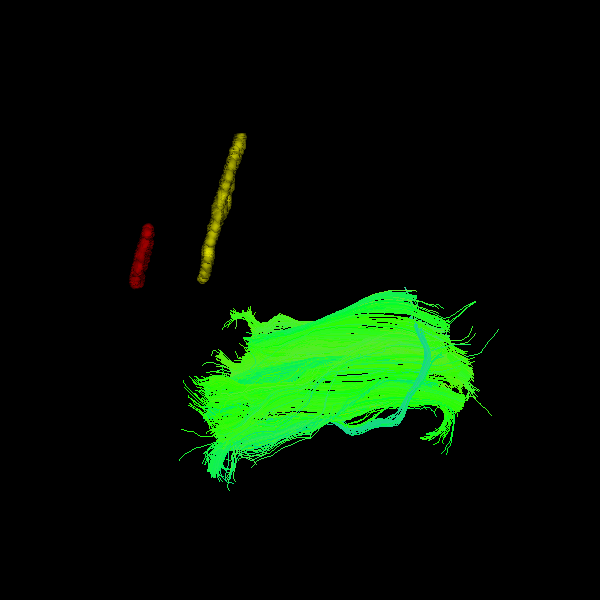

In [41]:
genren_rois_NEW(streamlines,roi1,roi2,'TEST.png')
Image('TEST.png')